In [15]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
%matplotlib inline 

In [10]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

In [16]:
test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

In [17]:
features = ['density', 'sulphates', 'residual_sugar']
results = []

In [20]:
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

Neighbors: 1, Accuracy: 0.756911
Neighbors: 3, Accuracy: 0.764370
Neighbors: 5, Accuracy: 0.765248
Neighbors: 7, Accuracy: 0.778631
Neighbors: 9, Accuracy: 0.781483
Neighbors: 11, Accuracy: 0.785871
Neighbors: 13, Accuracy: 0.792892
Neighbors: 15, Accuracy: 0.797938
Neighbors: 17, Accuracy: 0.799473
Neighbors: 19, Accuracy: 0.796183
Neighbors: 21, Accuracy: 0.798815
Neighbors: 23, Accuracy: 0.799912
Neighbors: 25, Accuracy: 0.801009
Neighbors: 27, Accuracy: 0.800132
Neighbors: 29, Accuracy: 0.804739
Neighbors: 31, Accuracy: 0.803203
Neighbors: 33, Accuracy: 0.804520
Neighbors: 35, Accuracy: 0.805397
Neighbors: 37, Accuracy: 0.805836
Neighbors: 39, Accuracy: 0.804300
Neighbors: 41, Accuracy: 0.806055
Neighbors: 43, Accuracy: 0.806055
Neighbors: 45, Accuracy: 0.806055
Neighbors: 47, Accuracy: 0.806055
Neighbors: 49, Accuracy: 0.806055


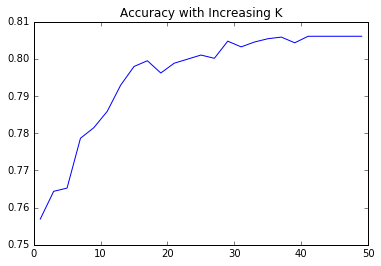

In [21]:
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()